In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import numpy as np
import warnings
from tabulate import tabulate

# Question 1

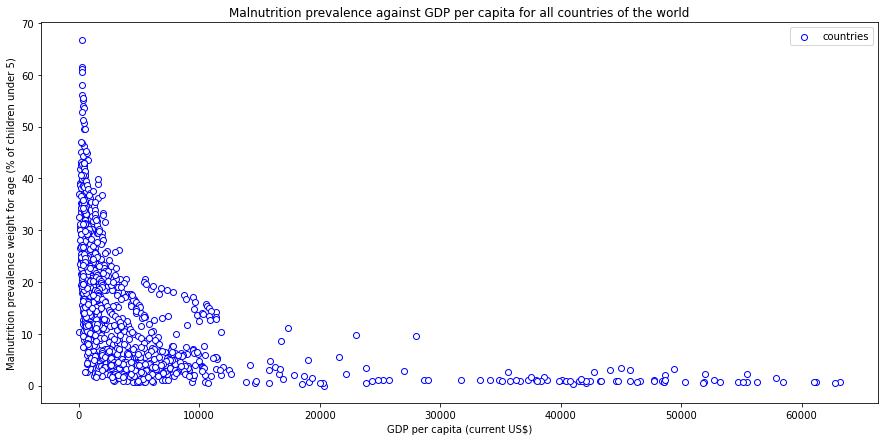

In [56]:
# Question 1

# read the GDP excel file and remove the first rows which contains the data source and last updated date
dfGDP = pd.read_excel('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_4484921.xls', header = 2)
# Convert first row to header and remove the row
dfGDP = dfGDP.rename(columns=dfGDP.iloc[0]).loc[1:]
# read the malnutrition excel file and remove the first 2 rows
dfSTA = pd.read_excel('API_SH.STA.MALN.ZS_DS2_en_excel_v2_4484467.xls', header = 2)
# Convert first row to header and remove the row
dfSTA = dfSTA.rename(columns=dfSTA.iloc[0]).loc[1:]

# making the graph bigger for better visibility
plt.figure(figsize=(15, 7))

# plot every country's GDP and Malnutrition data
for x in range(1, len(dfGDP)):
    # used for the legend, label only 1 point     
    if(x == len(dfGDP) - 1):
        plt.scatter(dfGDP.iloc[x][4:], dfSTA.iloc[x][4:], color='white', edgecolor='blue', label = 'countries')
    else: 
        plt.scatter(dfGDP.iloc[x][4:], dfSTA.iloc[x][4:], color='white', edgecolor='blue')
        

# naming the x axis
plt.xlabel('GDP per capita (current US$)')
# naming the y axis
plt.ylabel('Malnutrition prevalence weight for age (% of children under 5)')

# giving a title to my graph
plt.title('Malnutrition prevalence against GDP per capita for all countries of the world')

plt.legend(numpoints=1)


plt.show()


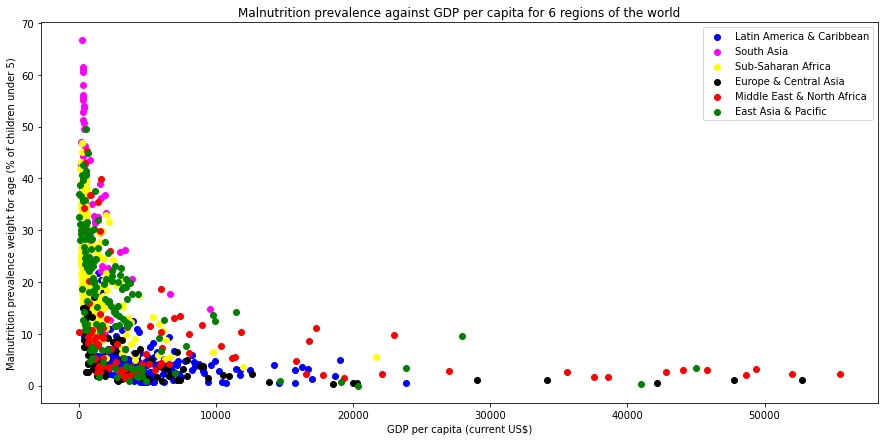

In [57]:
# Question 1, Graph 2

# read the metadata sheet of the GDP file
dfGDP_metadata = pd.read_excel('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_4484921.xls', sheet_name=1)
# Drop the unused columns
dfGDP_metadata.drop(["SpecialNotes", "TableName"], axis = 1, inplace=True)

# merging GDP dataset with the metadata to get the additional region and income group columns based on country code
dfGDP_merged = dfGDP.merge(dfGDP_metadata[['Country Code', 'Region', 'IncomeGroup']], on = 'Country Code', how = 'left')

# initializing the datasets of GDP and malnutrition for every region and giving them the same columns as GDP dataframe 
dfLatinGDP = pd.DataFrame(columns=dfGDP.columns)
dfLatinSTA = pd.DataFrame(columns=dfGDP.columns)
dfSouthAsiaGDP = pd.DataFrame(columns=dfGDP.columns)
dfSouthAsiaSTA = pd.DataFrame(columns=dfGDP.columns)
dfSubAfricaGDP = pd.DataFrame(columns=dfGDP.columns)
dfSubAfricaSTA = pd.DataFrame(columns=dfGDP.columns)
dfEuropeCentralAsiaGDP = pd.DataFrame(columns=dfGDP.columns)
dfEuropeCentralAsiaSTA = pd.DataFrame(columns=dfGDP.columns)
dfMiddleGDP = pd.DataFrame(columns=dfGDP.columns)
dfMiddleSTA = pd.DataFrame(columns=dfGDP.columns)
dfAsiaPacificGDP = pd.DataFrame(columns=dfGDP.columns)
dfAsiaPacificSTA = pd.DataFrame(columns=dfGDP.columns)

# looping through the dfGPD_merged dataset, checking if the region value matches one of the six and adding it to that regions dataframe
# for both GDP and malnutrition
for x in range(1, len(dfGDP_merged)):
    if(dfGDP_merged['Region'].loc[x] == "Latin America & Caribbean"):
        dfLatinGDP.loc[len(dfLatinGDP.index)] = dfGDP.iloc[x]
        dfLatinSTA.loc[len(dfLatinSTA.index)] = dfSTA.iloc[x]
        
    elif(dfGDP_merged['Region'].loc[x] == "South Asia"):
        dfSouthAsiaGDP.loc[len(dfSouthAsiaGDP.index)] = dfGDP.iloc[x]
        dfSouthAsiaSTA.loc[len(dfSouthAsiaSTA.index)] = dfSTA.iloc[x]
        
    elif(dfGDP_merged['Region'].loc[x] == "Sub-Saharan Africa"):
        dfSubAfricaGDP.loc[len(dfSubAfricaGDP.index)] = dfGDP.iloc[x]
        dfSubAfricaSTA.loc[len(dfSubAfricaSTA.index)] = dfSTA.iloc[x]
        
    elif(dfGDP_merged['Region'].loc[x] == "Europe & Central Asia"):
        dfEuropeCentralAsiaGDP.loc[len(dfEuropeCentralAsiaGDP.index)] = dfGDP.iloc[x]
        dfEuropeCentralAsiaSTA.loc[len(dfEuropeCentralAsiaSTA.index)] = dfSTA.iloc[x]
        
    elif(dfGDP_merged['Region'].loc[x] == "Middle East & North Africa"):
        dfMiddleGDP.loc[len(dfMiddleGDP.index)] = dfGDP.iloc[x]
        dfMiddleSTA.loc[len(dfMiddleSTA.index)] = dfSTA.iloc[x]
        
    elif(dfGDP_merged['Region'].loc[x] == "East Asia & Pacific"):
        dfAsiaPacificGDP.loc[len(dfAsiaPacificGDP.index)] = dfGDP.iloc[x]
        dfAsiaPacificSTA.loc[len(dfAsiaPacificSTA.index)] = dfSTA.iloc[x]


# making the graph bigger for better visibility
plt.figure(figsize=(15, 7))

# plotting the points for every region
plt.scatter(dfLatinGDP[dfLatinGDP.columns[4:]], dfLatinSTA[dfLatinSTA.columns[4:]], color = 'blue', label= "Latin America & Caribbean")

plt.scatter(dfSouthAsiaGDP[dfSouthAsiaGDP.columns[4:]], dfSouthAsiaSTA[dfSouthAsiaSTA.columns[4:]], color = 'magenta', label= "South Asia")

plt.scatter(dfSubAfricaGDP[dfSubAfricaGDP.columns[4:]], dfSubAfricaSTA[dfSubAfricaSTA.columns[4:]], color = 'yellow', label= "Sub-Saharan Africa")

plt.scatter(dfEuropeCentralAsiaGDP[dfEuropeCentralAsiaGDP.columns[4:]], dfEuropeCentralAsiaSTA[dfEuropeCentralAsiaSTA.columns[4:]], color = 'black', label= "Europe & Central Asia")

plt.scatter(dfMiddleGDP[dfMiddleGDP.columns[4:]], dfMiddleSTA[dfMiddleSTA.columns[4:]], color = 'red', label= "Middle East & North Africa")

plt.scatter(dfAsiaPacificGDP[dfAsiaPacificGDP.columns[4:]], dfAsiaPacificSTA[dfAsiaPacificSTA.columns[4:]], color = 'green', label= "East Asia & Pacific")
    
# naming the x axis
plt.xlabel('GDP per capita (current US$)')
# naming the y axis
plt.ylabel('Malnutrition prevalence weight for age (% of children under 5)')

# giving a title to my graph
plt.title('Malnutrition prevalence against GDP per capita for 6 regions of the world')

# Adding legend, which helps us recognize the curve according to it's color
# displaying the legend outside the graph for better visibility
plt.legend()


plt.show()


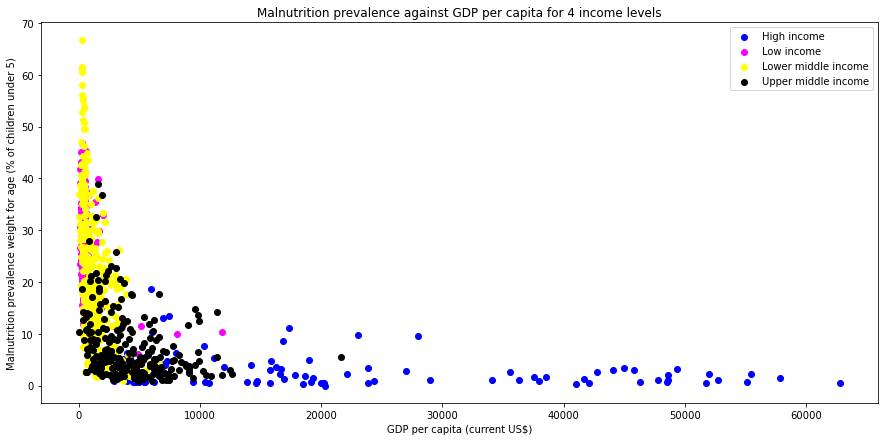

In [58]:
# Question , Graph 3

# initializing the datasets of GDP and malnutrition for every income level and giving them the same columns as GDP dataframe 
dfHighGDP = pd.DataFrame(columns=dfGDP.columns)
dfHighSTA = pd.DataFrame(columns=dfGDP.columns)
dfLowGDP = pd.DataFrame(columns=dfGDP.columns)
dfLowSTA = pd.DataFrame(columns=dfGDP.columns)
dfLowMiddleGDP = pd.DataFrame(columns=dfGDP.columns)
dfLowMiddleSTA = pd.DataFrame(columns=dfGDP.columns)
dfUpperMiddleGDP = pd.DataFrame(columns=dfGDP.columns)
dfUpperMiddleSTA = pd.DataFrame(columns=dfGDP.columns)


# looping through the dfGPD_merged dataset, checking if the income group value matches one of the four and adding it to that income level's dataframe
# for both GDP and malnutrition
for x in range(1, 266):
    if(dfGDP_merged['IncomeGroup'].loc[x] == 'High income'):
        dfHighGDP.loc[len(dfHighGDP.index)] = dfGDP.iloc[x]
        dfHighSTA.loc[len(dfHighSTA.index)] = dfSTA.iloc[x]
        
    elif(dfGDP_merged['IncomeGroup'].loc[x] == 'Low income'):
        dfLowGDP.loc[len(dfLowGDP.index)] = dfGDP.iloc[x]
        dfLowSTA.loc[len(dfLowSTA.index)] = dfSTA.iloc[x]
        
    elif(dfGDP_merged['IncomeGroup'].loc[x] == 'Lower middle income'):
        dfLowMiddleGDP.loc[len(dfLowMiddleGDP.index)] = dfGDP.iloc[x]
        dfLowMiddleSTA.loc[len(dfLowMiddleSTA.index)] = dfSTA.iloc[x]
        
    elif(dfGDP_merged['IncomeGroup'].loc[x] == 'Upper middle income'):
        dfUpperMiddleGDP.loc[len(dfUpperMiddleGDP.index)] = dfGDP.iloc[x]
        dfUpperMiddleSTA.loc[len(dfUpperMiddleSTA.index)] = dfSTA.iloc[x]
        
# making the graph bigger for better visibility
plt.figure(figsize=(15, 7))

# plotting the points for income level
plt.scatter(dfHighGDP[dfHighGDP.columns[4:]], dfHighSTA[dfHighSTA.columns[4:]], color = 'blue', label= "High income")

plt.scatter(dfLowGDP[dfLowGDP.columns[4:]], dfLowSTA[dfLowSTA.columns[4:]], color = 'magenta', label= "Low income")

plt.scatter(dfLowMiddleGDP[dfLowMiddleGDP.columns[4:]], dfLowMiddleSTA[dfLowMiddleSTA.columns[4:]], color = 'yellow', label= "Lower middle income")

plt.scatter(dfUpperMiddleGDP[dfUpperMiddleGDP.columns[4:]], dfUpperMiddleSTA[dfUpperMiddleSTA.columns[4:]], color = 'black', label= "Upper middle income")


# naming the x axis
plt.xlabel('GDP per capita (current US$)')
# naming the y axis
plt.ylabel('Malnutrition prevalence weight for age (% of children under 5)')

# giving a title to my graph
plt.title('Malnutrition prevalence against GDP per capita for 4 income levels')

# Adding legend, which helps us recognize the curve according to it's color
# displaying the legend outside the graph for better visibility
plt.legend()


plt.show()

# Question 2

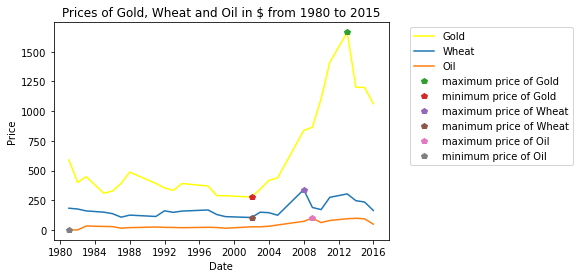

In [12]:
# Question 2

# setting my api key for quandl
quandl.ApiConfig.api_key = "BZzDay6TnuNnvx4x7Rzs"
# getting the respective wheat, oil and gold datasets
dfWheat = quandl.get('ODA/PWHEAMT_USD')
dfOil = quandl.get('WGEC/WLD_CRUDE_WTI')
dfGold = quandl.get('BUNDESBANK/BBK01_WT5511')

# merging the gold and wheat datasets then the merged and oil dataset and dropping na values
dfSync =  pd.merge(dfGold, dfWheat, left_index=True, right_index=True)
dfSync = pd.merge(dfSync, dfOil, left_index=True, right_index=True).dropna()

# rename the value columns for ease for access and understanding 
dfSync.rename(columns = {'Value_x':'Gold', 'Value_y': 'Wheat', 'Value':'Oil'}, inplace = True)


# plotting the 3 graphs
plt.plot(dfSync.index, dfSync['Gold'], color = 'yellow', label= "Gold")
plt.plot(dfSync.index, dfSync['Wheat'], label= "Wheat")
plt.plot(dfSync.index, dfSync['Oil'], label= "Oil")

# plotting the maximum and minimum point of each one
plt.plot(dfSync.index[dfSync['Gold'] == dfSync['Gold'].max()], dfSync['Gold'].max(), 'p', label= "maximum price of Gold")
plt.plot(dfSync.index[dfSync['Gold'] == dfSync['Gold'].min()], dfSync['Gold'].min(), 'p', label= "minimum price of Gold")
plt.plot(dfSync.index[dfSync['Wheat'] == dfSync['Wheat'].max()], dfSync['Wheat'].max(), 'p', label= "maximum price of Wheat")
plt.plot(dfSync.index[dfSync['Wheat'] == dfSync['Wheat'].min()], dfSync['Wheat'].min(), 'p', label= "manimum price of Wheat")
plt.plot(dfSync.index[dfSync['Oil'] == dfSync['Oil'].max()], dfSync['Oil'].max(), 'p', label= "maximum price of Oil")
plt.plot(dfSync.index[dfSync['Oil'] == dfSync['Oil'].min()][0], dfSync['Oil'].min(), 'p', label= "minimum price of Oil")

# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Price')

# giving a title to my graph
plt.title('Prices of Gold, Wheat and Oil in $ from 1980 to 2015')

# Adding legend, which helps us recognize the curve according to it's color
# displaying the legend outside the graph for better visibility
plt.legend(bbox_to_anchor=(1.05, 1))


plt.show()



# Question 3

In [28]:


# reading the C02 emissions data
dfCO2 = pd.read_excel('API_EN.ATM.CO2E.PC_DS2_en_excel_v2_4499478.xls', header = 2)
# Convert first row to header and remove the row
dfCO2 = dfCO2.rename(columns=dfCO2.iloc[0]).loc[1:]

# use describe function to get the summary
dfC02Summary = dfCO2[2010.0].describe(percentiles= [.05, .25, .75, .95])

#  reading the primary enrollment data
dfENR = pd.read_excel('API_SE.PRM.NENR_DS2_en_excel_v2_4523381.xls', header = 2)
# Convert first row to header and remove the row
dfENR = dfENR.rename(columns=dfENR.iloc[0]).loc[1:]

# use describe function to get the summary
dfENRSummary = dfENR[2010.0].describe(percentiles= [.05, .25, .75, .95])

print('C02 emissions (metric tons per capita) summary statistics in 2010')
print()

# data for C02 table
C02data = [
    ["Mean", dfC02Summary.loc['mean']],
    ["Median", dfC02Summary.loc['50%']],
    ["Standard deviation", dfC02Summary.loc['std']],
      ["5%", dfC02Summary.loc['5%']],
     ["25%", dfC02Summary.loc['25%']],
     ["75%", dfC02Summary.loc['75%']],
     ["95%", dfC02Summary.loc['95%']],
]

# display table
print(tabulate(C02data, tablefmt="grid"))

print()
print('Primary Enrollment (% net) summary statistics in 2010')
print()
# data for enrollement table
ENRdata = [
    ["Mean", dfENRSummary.loc['mean']],
    ["Median", dfENRSummary.loc['50%']],
    ["Standard deviation", dfENRSummary.loc['std']],
      ["5%", dfENRSummary.loc['5%']],
     ["25%", dfENRSummary.loc['25%']],
     ["75%", dfENRSummary.loc['75%']],
     ["95%", dfENRSummary.loc['95%']],
]

# display table
print(tabulate(ENRdata, tablefmt="grid"))

C02 emissions (metric tons per capita) summary statistics in 2010

+--------------------+-----------+
| Mean               |  4.33309  |
+--------------------+-----------+
| Median             |  2.68257  |
+--------------------+-----------+
| Standard deviation |  5.01682  |
+--------------------+-----------+
| 5%                 |  0.112875 |
+--------------------+-----------+
| 25%                |  0.721447 |
+--------------------+-----------+
| 75%                |  6.08406  |
+--------------------+-----------+
| 95%                | 15.5108   |
+--------------------+-----------+

Primary Enrollment (% net) summary statistics in 2010

+--------------------+----------+
| Mean               | 90.1051  |
+--------------------+----------+
| Median             | 92.9567  |
+--------------------+----------+
| Standard deviation |  9.52763 |
+--------------------+----------+
| 5%                 | 66.6568  |
+--------------------+----------+
| 25%                | 87.801   |
+-----------

# Question 4

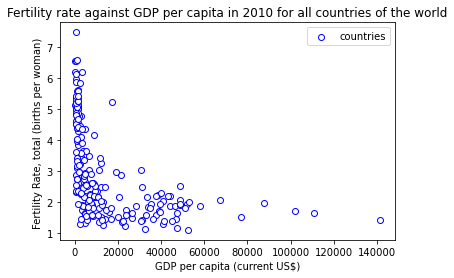

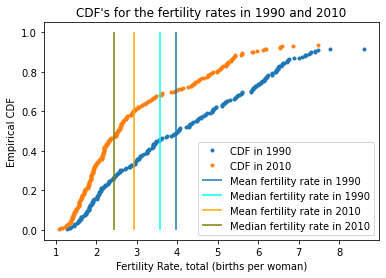

In [64]:
# Question 4

# read fertility excel file
dfFERT = pd.read_excel('API_SP.DYN.TFRT.IN_DS2_en_excel_v2_4521929.xls', header = 2)
# Convert first row to header and remove the row
dfFERT = dfFERT.rename(columns=dfFERT.iloc[0]).loc[1:]


# plotting fertility against GDP
for x in range(1, len(dfGDP)):
    if(x == len(dfGDP) - 1):
        plt.scatter(dfGDP.iloc[x][2010.0], dfFERT.iloc[x][2010.0], color='white', edgecolor='blue', label='countries')
    else:    
        plt.scatter(dfGDP.iloc[x][2010.0], dfFERT.iloc[x][2010.0], color='white', edgecolor='blue')

# naming the x axis
plt.xlabel('GDP per capita (current US$)')
# naming the y axis
plt.ylabel('Fertility Rate, total (births per woman) ')

plt.legend()

# giving a title to my graph
plt.title('Fertility rate against GDP per capita in 2010 for all countries of the world')

plt.show()

# sort fertility data for 1990
x = np.sort(dfFERT[1990.0])
# get a list of values until 1
y = np.arange(1, len(x) + 1) / float(len(x))

# sort fertility data for 1990
x1 = np.sort(dfFERT[2010.0])
# get a list of values until 1
y1 = np.arange(1, len(x1) + 1) / len(x1)

# plot the CDF's
plt.plot(x, y, marker='.', linestyle='none', label='CDF in 1990')
plt.plot(x1, y1, marker='.', linestyle='none', label='CDF in 2010')

# plot the median and mean feritlity rates for 1990 and 2010
plt.vlines(dfFERT[1990.0].mean(), ymin=0, ymax = 1, label='Mean fertility rate in 1990')
plt.vlines(dfFERT[1990.0].median(), ymin=0, ymax = 1, color='cyan', label='Median fertility rate in 1990')

plt.vlines(dfFERT[2010.0].mean(), ymin=0, ymax = 1, color='orange', label='Mean fertility rate in 2010')
plt.vlines(dfFERT[2010.0].median(), ymin=0, ymax = 1, color='olive', label='Median fertility rate in 2010')

# naming the x axis
plt.xlabel('Fertility Rate, total (births per woman)')
# naming the y axis
plt.ylabel('Empirical CDF')

# giving a title to my graph
plt.title("CDF's for the fertility rates in 1990 and 2010")

plt.legend()

plt.show()


# Question 5

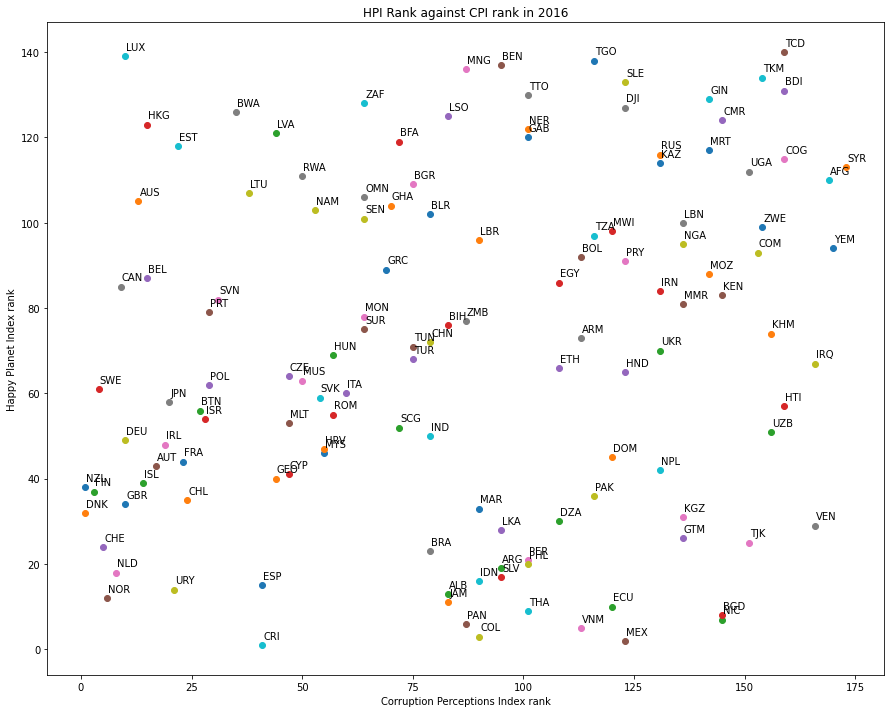

In [65]:

# don't show warnings for reading .xlsx files
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

# read excel file of CPI and only choose the columns needed
dfCPI = pd.read_excel('CPI2016_Results.xlsx')
dfCPI = dfCPI[['Country','WB Code', 'Rank']]

# read excel file of HPI
dfHPI = pd.read_excel('hpi-data-2016.xlsx', sheet_name='Rank order', header = 5)
# Convert first row to header and remove the row
dfHPI = dfHPI.rename(columns=dfHPI.iloc[0]).loc[1:]
# choose only the columns needed
dfHPI = dfHPI[['Country', 'HPI Rank']]

# merge the datasets based on country
dfMerged = dfCPI.merge(dfHPI[['Country', 'HPI Rank']], on = 'Country', how = 'left')
# remove NA rows
dfMerged = dfMerged.dropna()

# making the graph bigger for better visibility
plt.figure(figsize=(15, 12))

# loop every row and plot HPI against CPI
for x in range(0, len(dfMerged)):
    plt.scatter(dfMerged.iloc[x]['Rank'], dfMerged.iloc[x]['HPI Rank'], label = dfMerged.iloc[x]['Country'])
    # annotate every point with the country code     
    plt.annotate(dfMerged.iloc[x]['WB Code'], (dfMerged.iloc[x]['Rank'], dfMerged.iloc[x]['HPI Rank']), xytext=(1, 6), textcoords="offset pixels")

# naming the x axis
plt.xlabel('Corruption Perceptions Index rank')
# naming the y axis
plt.ylabel('Happy Planet Index rank')

# giving a title to my graph
plt.title('HPI Rank against CPI rank in 2016')


plt.show()
